In [1]:
import json

# Baca file JSON dan baca isi JSON sebagai string
with open("ekstraksi.json", "r") as json_file:
    json_string = json_file.read()

# Mengurai string JSON menjadi objek Python
json_data = json.loads(json_string)

In [2]:
# Mengakses data dalam variabel json_data
dst_sample_rate = json_data["dst_sample_rate"]
segment_duration = json_data["segment_duration"]
segment_length = json_data["segment_length"]
segments = json_data["segments"]

In [3]:
import numpy as np

fft_segments = []
fft_magnitudes = []

def calculate_fft(segment):
    N = len(segment)  # Panjang segmen audio
    X = np.zeros(N, dtype=np.complex128)  # Inisialisasi array koefisien FFT

    for k in range(N):
        for n in range(N):
            X[k] += segment[n] * np.exp(-2j * np.pi * k * n / N)

    return X

# Contoh penggunaan pada setiap segmen audio
for segment in segments:
    # Terapkan windowing (misalnya, Hamming window)
    windowed_segment = segment * np.hamming(len(segment))

    # Hitung FFT
    fft_result = calculate_fft(windowed_segment)

    # Mengambil magnitudo FFT
    magnitude = np.abs(fft_result)

    fft_segments.append(fft_result)
    fft_magnitudes.append(magnitude)

print("JUMLAH FFT SEGMENTS => ", len(fft_segments))
print("JUMLAH FFT MAGNITUDES => ", len(fft_magnitudes))

JUMLAH FFT SEGMENTS =>  31
JUMLAH FFT MAGNITUDES =>  31


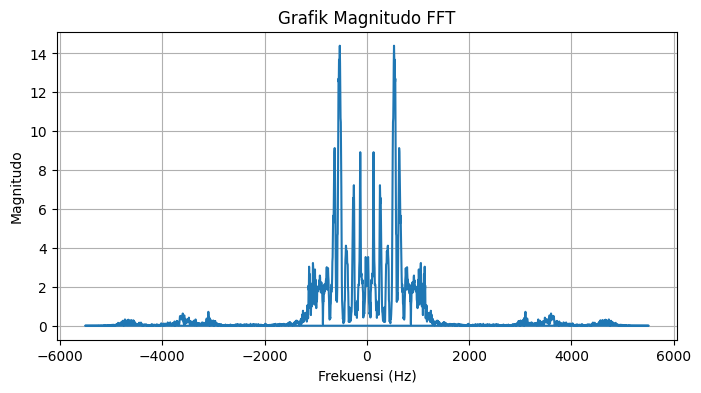

In [4]:
import matplotlib.pyplot as plt

# Ambil salah satu potongan audio dan hasil magnitudo FFTnya
frequency = fft_segments[9]
fft_magnitude = fft_magnitudes[9]

# Buat array frekuensi yang sesuai
freqs = np.fft.fftfreq(segment_length, 1/dst_sample_rate)

# Plot grafik magnitudo FFT
plt.figure(figsize=(8, 4))
plt.plot(freqs, fft_magnitude)
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo')
plt.title('Grafik Magnitudo FFT')
plt.grid(True)
plt.show()

In [5]:
energies = []
for fft_segment in fft_segments:
    energy = np.sum(np.abs(fft_segment)**2) / len(fft_segment)
    energies.append(energy)

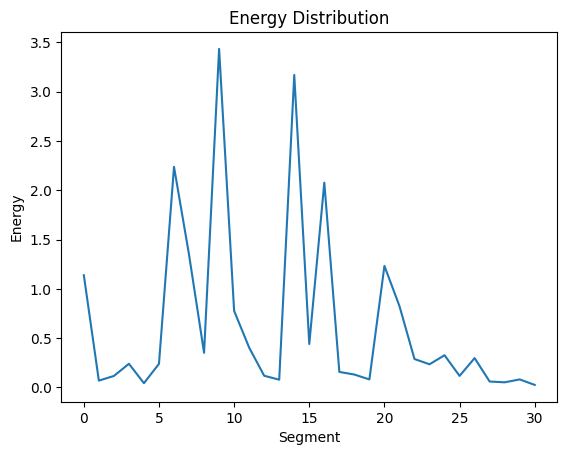

In [6]:
import matplotlib.pyplot as plt

# Menghasilkan sumbu x (indeks segmen)
x = range(len(energies))

# Memplot data energi
plt.plot(x, energies)
plt.xlabel('Segment')
plt.ylabel('Energy')
plt.title('Energy Distribution')
plt.show()

In [7]:
silent_threshold = 0.1  # Ubah ambang diam sesuai dengan kebutuhan

silent_ratios = []
for segment in segments:
    silent_samples = np.sum(np.abs(segment) <= silent_threshold)
    total_samples = len(segment)
    silent_ratio = silent_samples / total_samples
    silent_ratios.append(silent_ratio)

In [8]:
average_silent_ratio = np.mean(silent_ratios)
average_energy = np.mean(energies)

In [9]:
import pandas as pd

# Membuat DataFrame dari data Average Energy dan Silent Ratios
data = {'Segment': range(1, len(energies) + 1),
        'Average Energy': energies,
        'Silent Ratio': silent_ratios}

df = pd.DataFrame(data)

# Menampilkan tabel
print(df)

    Segment  Average Energy  Silent Ratio
0         1        1.138343      1.000000
1         2        0.069230      1.000000
2         3        0.116455      1.000000
3         4        0.239993      1.000000
4         5        0.043217      1.000000
5         6        0.239524      0.982313
6         7        2.237746      0.912472
7         8        1.346473      0.992744
8         9        0.351437      1.000000
9        10        3.433813      0.926077
10       11        0.776612      0.998186
11       12        0.404039      0.999093
12       13        0.118668      1.000000
13       14        0.078597      1.000000
14       15        3.169995      0.894331
15       16        0.440565      0.996825
16       17        2.077633      0.948299
17       18        0.157579      1.000000
18       19        0.130741      1.000000
19       20        0.081442      1.000000
20       21        1.233069      0.964172
21       22        0.825252      0.976417
22       23        0.288340      1

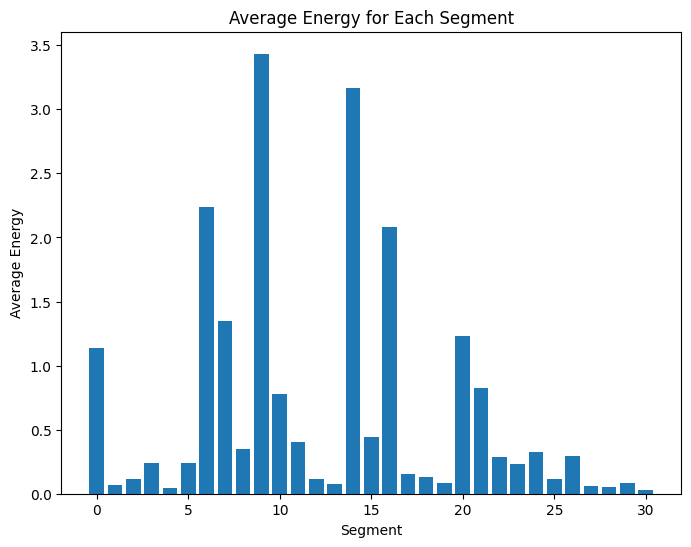

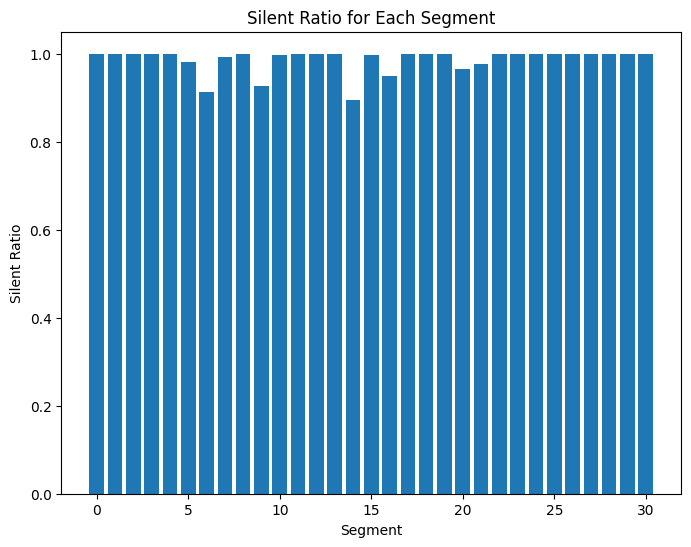

In [10]:
import matplotlib.pyplot as plt

# Visualisasi Average Energy
plt.figure(figsize=(8, 6))
plt.bar(range(len(energies)), energies)
plt.xlabel('Segment')
plt.ylabel('Average Energy')
plt.title('Average Energy for Each Segment')
plt.show()

# Visualisasi Silent Ratios
plt.figure(figsize=(8, 6))
plt.bar(range(len(silent_ratios)), silent_ratios)
plt.xlabel('Segment')
plt.ylabel('Silent Ratio')
plt.title('Silent Ratio for Each Segment')
plt.show()

In [11]:
print(f"Silent Ratio\t\t\t{average_silent_ratio:.5f}")
print(f"Average Energy\t\t\t{average_energy:.4f}")

Silent Ratio			0.98680
Average Energy			0.6514
